In [2]:
import pandas as pd

path = "data/cities.csv"

cities_df = pd.read_csv(path)
cities_df

,City,Province/State,Country,North-South,East-West,Coordinates,Near Latitude,Near Longitude
0,Adak,Alaska,United States,Northern,Western,51°53′N 176°39′W,50,-175
1,Honolulu,Hawaii,United States,Northern,Western,21°19′N 157°50′W,20,-160
2,Barrow,Alaska,United States,Northern,Western,71°18′N 156°46′W,70,-155
3,Hilo,Hawaii,United States,Northern,Western,19°42′N 155°05′W,20,-155
4,Anchorage,Alaska,United States,Northern,Western,61°13′N 149°54′W,60,-150
...,...,...,...,...,...,...,...,...
945,Hastings,NaN,New Zealand,Southern,Eastern,39°39′S 176°50′E,-40,175
946,Suva,NaN,Fiji,Southern,Eastern,18°08′S 178°27′E,-20,180
947,Funafuti,NaN,Tuvalu,Southern,Eastern,8°31′S 179°13′E,-10,180
948,Labasa,NaN,Fiji,Southern,Eastern,16°26′S 179°22′E,-15,180


In [6]:
import numpy as np
from typing import List, Optional, Tuple


def filter_cities(df: pd.DataFrame, names: List[str]) -> pd.DataFrame:
    return df[df["City"].isin(names)]

def get_coordinates(
        df: pd.DataFrame,
        names: Optional[List[str]] = None,
) -> pd.DataFrame:
    if names:
        df = filter_cities(df, names)

    lat = df["Near Latitude"].values * np.pi/180
    lon = df["Near Longitude"].values * np.pi/180

    earth_radius = 6371
    return pd.DataFrame({
        "city": df["City"].values,
        "x": earth_radius*np.cos(lat)*np.cos(lon),
        "y": earth_radius*np.cos(lat)*np.sin(lon),
    })


coordinates_df = get_coordinates(cities_df, [
    "Dallas",
    "Detroit",
    "Los Angeles",
    "Miami",
    "New York City",
    "Oklahoma City",
    "San Francisco",
])
coordinates_df

,city,x,y
0,San Francisco,-2440.234574,-4226.610264
1,Los Angeles,-2609.408837,-4519.628684
2,Oklahoma City,-906.238179,-5139.532107
3,Dallas,-454.849931,-5198.958497
4,Detroit,425.360913,-4861.897489
5,Miami,1002.659670,-5686.365557
6,New York City,1263.158364,-4714.171194


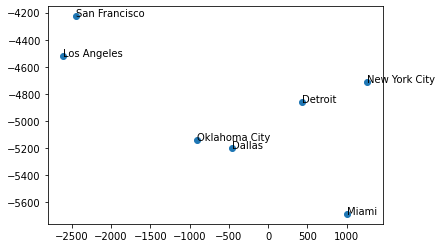

In [8]:
from matplotlib import pyplot as plt

X = coordinates_df["x"]
Y = coordinates_df["y"]
T = coordinates_df["city"]

fix, ax = plt.subplots()
ax.scatter(X, Y)
for x, y, t in zip(X, Y, T):
    ax.annotate(t, (x, y))